# <span style='background :skyblue' > Importing libraries </span>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import time
import warnings
warnings.filterwarnings('ignore')

from numpy import set_printoptions
import plotly.express as px

from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler,Normalizer
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold , cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble  import AdaBoostClassifier,GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
from sklearn.svm import SVC,LinearSVC
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

## `Shipment Dataset`

In [2]:
cust_data=pd.read_csv("shipments.csv")
cust_data.drop('ID',axis=1,inplace=True)
cust_data.head(10)

Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0               D           Flight                    4                2   
1               F           Flight                    4                5   
2               A           Flight                    2                2   
3               B           Flight                    3                3   
4               C           Flight                    2                2   
5               F           Flight                    3                1   
6               D           Flight                    3                4   
7               F           Flight                    4                1   
8               A           Flight                    3                4   
9               B           Flight                    3                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   
5                  162                3             medium      F   
6                  250                3                low      F   
7                  233                2                low      F   
8                  150                3                low      F   
9                  164                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233                    1  
1                59           3088                    1  
2                48           3374                    1  
3                10           1177                    1  
4                46           2484                    1  
5                12           1417                    1  
6                 3           2371                    1  
7                48           2804                    1  
8                11           1861                    1  
9                29           1187                    1

#### `customer ID is not important in model building, so remove that column`

## `Check the dimensions of the dataset`

In [3]:
print("-"*21)
print("Number of rows:",cust_data.shape[0])
print("Number of columns:",cust_data.shape[1])
print("-"*21)

---------------------
Number of rows: 10999
Number of columns: 11
---------------------


## `Data Information `

In [4]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 945.4+ KB


## `Check the null values in data`

In [5]:
print("-"*30)
print("Null Values")
print("-"*30)
print(cust_data.isnull().sum())
print("-"*30)
print("Value Counts")
print("-"*30)
print(cust_data.count())
print("-"*30)

------------------------------
Null Values
------------------------------
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64
------------------------------
Value Counts
------------------------------
Warehouse_block        10999
Mode_of_Shipment       10999
Customer_care_calls    10999
Customer_rating        10999
Cost_of_the_Product    10999
Prior_purchases        10999
Product_importance     10999
Gender                 10999
Discount_offered       10999
Weight_in_gms          10999
Reached.on.Time_Y.N    10999
dtype: int64
------------------------------


### `There are no null values in the database, having 10999 observations & 11 columns`

In [6]:
cust_data.describe(include='object')

Warehouse_block Mode_of_Shipment Product_importance Gender
count            10999            10999              10999  10999
unique               5                3                  3      2
top                  F             Ship                low      F
freq              3666             7462               5297   5545

In [7]:
cust_data[cust_data.duplicated()]

Empty DataFrame
Columns: [Warehouse_block, Mode_of_Shipment, Customer_care_calls, Customer_rating, Cost_of_the_Product, Prior_purchases, Product_importance, Gender, Discount_offered, Weight_in_gms, Reached.on.Time_Y.N]
Index: []

#### <span style='background :skyblue' > No duplicated records in the dataset` </span>

# `Changing the column name`

In [8]:
cust_data.rename(columns={'Reached.on.Time_Y.N':'Reached_on_time'}, inplace=True)
cust_data["Reached_on_time"]=cust_data["Reached_on_time"].apply(lambda x: "OnTime" if x==0 else "Delayed")

## `Convert the object datatype into categorical data`

In [9]:
cust_data["Warehouse_block"] = cust_data.Warehouse_block.astype('category')
cust_data["Mode_of_Shipment"] = cust_data.Mode_of_Shipment.astype('category')
cust_data["Product_importance"] = cust_data.Product_importance.astype('category')
cust_data["Gender"] = cust_data.Gender.astype('category')
cust_data["Reached_on_time"] = cust_data.Reached_on_time.astype('category')
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Warehouse_block      10999 non-null  category
 1   Mode_of_Shipment     10999 non-null  category
 2   Customer_care_calls  10999 non-null  int64   
 3   Customer_rating      10999 non-null  int64   
 4   Cost_of_the_Product  10999 non-null  int64   
 5   Prior_purchases      10999 non-null  int64   
 6   Product_importance   10999 non-null  category
 7   Gender               10999 non-null  category
 8   Discount_offered     10999 non-null  int64   
 9   Weight_in_gms        10999 non-null  int64   
 10  Reached_on_time      10999 non-null  category
dtypes: category(5), int64(6)
memory usage: 570.1 KB


## `Describing The Data`

In [10]:
cust_data.describe().T

count         mean          std     min     25%  \
Customer_care_calls  10999.0     4.054459     1.141490     2.0     3.0   
Customer_rating      10999.0     2.990545     1.413603     1.0     2.0   
Cost_of_the_Product  10999.0   210.196836    48.063272    96.0   169.0   
Prior_purchases      10999.0     3.567597     1.522860     2.0     3.0   
Discount_offered     10999.0    13.373216    16.205527     1.0     4.0   
Weight_in_gms        10999.0  3634.016729  1635.377251  1001.0  1839.5   

                        50%     75%     max  
Customer_care_calls     4.0     5.0     7.0  
Customer_rating         3.0     4.0     5.0  
Cost_of_the_Product   214.0   251.0   310.0  
Prior_purchases         3.0     4.0    10.0  
Discount_offered        7.0    10.0    65.0  
Weight_in_gms        4149.0  5050.0  7846.0

### `Skewness & Kurtosis of data`

In [11]:
print("Skewness")
print("-"*30)
print(cust_data.skew())
print("-"*30)
print("Kurtosis")
print("-"*30)
print(cust_data.kurt())
print("-"*30)

Skewness
------------------------------
Customer_care_calls    0.391926
Customer_rating        0.004360
Cost_of_the_Product   -0.157117
Prior_purchases        1.681897
Discount_offered       1.798929
Weight_in_gms         -0.249747
dtype: float64
------------------------------
Kurtosis
------------------------------
Customer_care_calls   -0.308995
Customer_rating       -1.295654
Cost_of_the_Product   -0.972160
Prior_purchases        4.006342
Discount_offered       2.000586
Weight_in_gms         -1.447671
dtype: float64
------------------------------


## `Unique values`

In [12]:
cust_data.iloc[:,[0,1,6,7]].nunique()

Warehouse_block       5
Mode_of_Shipment      3
Product_importance    3
Gender                2
dtype: int64

## `Groupby warehouse & weight by reached on time`

In [13]:
af=cust_data.groupby(["Reached_on_time","Warehouse_block"])["Weight_in_gms"].mean()
af

Reached_on_time  Warehouse_block
Delayed          A                  3245.402791
                 B                  3274.194746
                 C                  3279.164534
                 D                  3291.018248
                 F                  3272.769371
OnTime           A                  4140.250660
                 B                  4183.167353
                 C                  4177.474966
                 D                  4130.554201
                 F                  4190.809103
Name: Weight_in_gms, dtype: float64

## `Heighest Weight in Warehouse Block `

In [14]:
warehouse_block_weight = cust_data.groupby(['Warehouse_block'])['Weight_in_gms'].sum().reset_index()
warehouse_block_weight

Warehouse_block  Weight_in_gms
0               A        6627118
1               B        6664240
2               C        6674560
3               D        6655305
4               F       13349327

# <span style='background :yellow' > Data Visualisation </span>

Out of 10,999 60% parcel Not Reached on time.


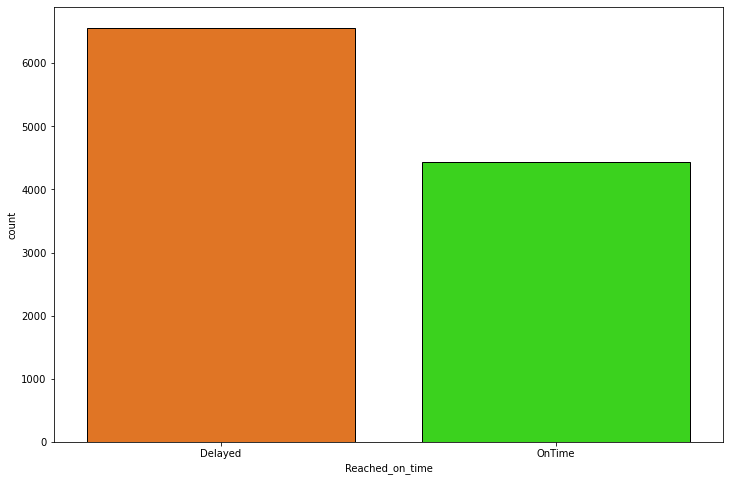

In [15]:
fig=plt.figure(figsize=(12,8))
sns.countplot(cust_data["Reached_on_time"],palette="gist_ncar_r",edgecolor="Black")
reached_in_percent =round((cust_data["Reached_on_time"].value_counts().values[0]/10999*100))
print("Out of 10,999 {}% parcel Not Reached on time.".format(reached_in_percent))

In [16]:
Reached = cust_data["Reached_on_time"].value_counts().reset_index() 
Reached.columns = ["Reached","Value"]  
Reached.drop("Reached",axis=1,inplace=True) 
Reached["Reached"] = ["Delayed Shipment","Shipment Ontime "]
fig = px.pie(Reached,names="Reached",values="Value",color_discrete_sequence=px.colors.sequential.Rainbow) 
fig.update_traces(textinfo='percent+label')

### <span style='background :pink' > Conclusion:</span>
`Only 40% of the the products have reached the destination at time , almost 60% had a delayed delivery time.`

## `Total Number of Female & Male`

------------------------------
F    50.413674
M    49.586326
Name: Gender, dtype: float64
------------------------------


<AxesSubplot:xlabel='Gender', ylabel='count'>

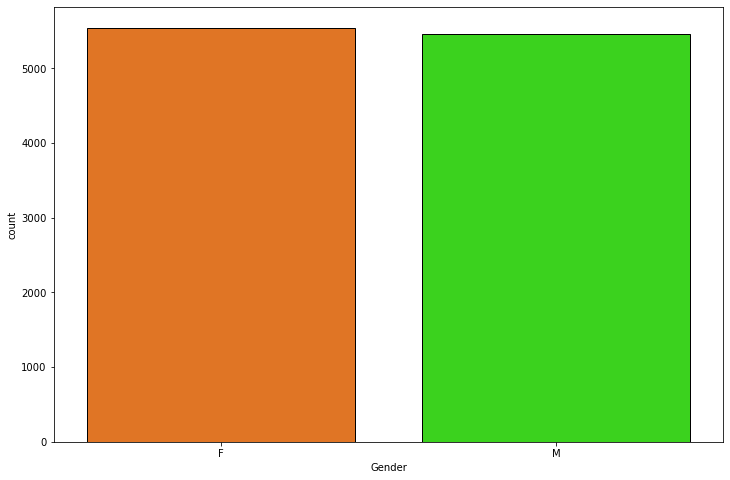

In [17]:
fig=plt.figure(figsize=(12,8))
print("-"*30)
print((cust_data["Gender"].value_counts()/10999)*100)
print("-"*30)
sns.countplot(cust_data["Gender"],edgecolor="Black", palette="gist_ncar_r")

## `Reached on time by Male & Female`

<AxesSubplot:xlabel='Reached_on_time', ylabel='count'>

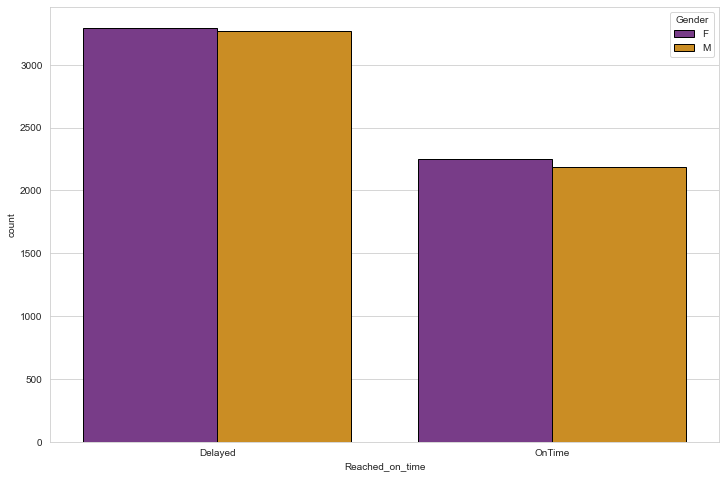

In [18]:
fig=plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.countplot(x="Reached_on_time",hue="Gender",data=cust_data, palette="CMRmap",edgecolor="Black")

## `Reached on time by shipment mode`

<AxesSubplot:xlabel='Mode_of_Shipment', ylabel='count'>

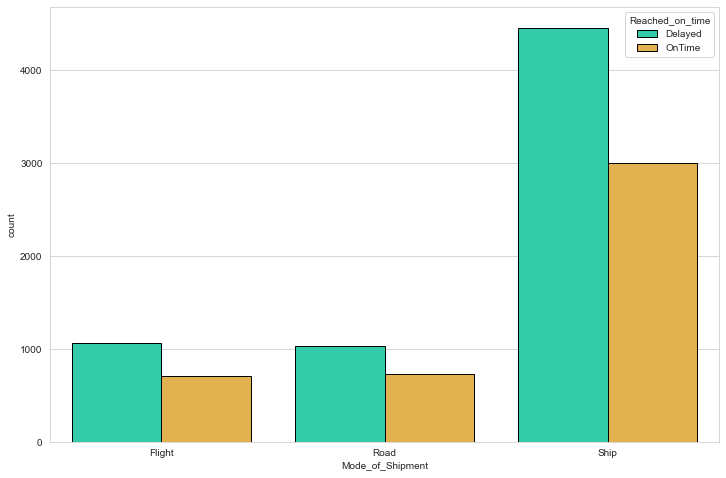

In [19]:
fig=plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.countplot(x="Mode_of_Shipment",hue="Reached_on_time",data=cust_data,palette="turbo",edgecolor="Black")

In [20]:
mode = cust_data['Mode_of_Shipment'].value_counts().reset_index()
mode.columns = ['Mode_of_Shipment', 'value_counts']
fig = px.pie(mode, names = 'Mode_of_Shipment', values = 'value_counts', color_discrete_sequence = px.colors.sequential.Hot, width = 600, height = 600)
fig.update_traces(textinfo = 'percent+label')

## `Pairplot`

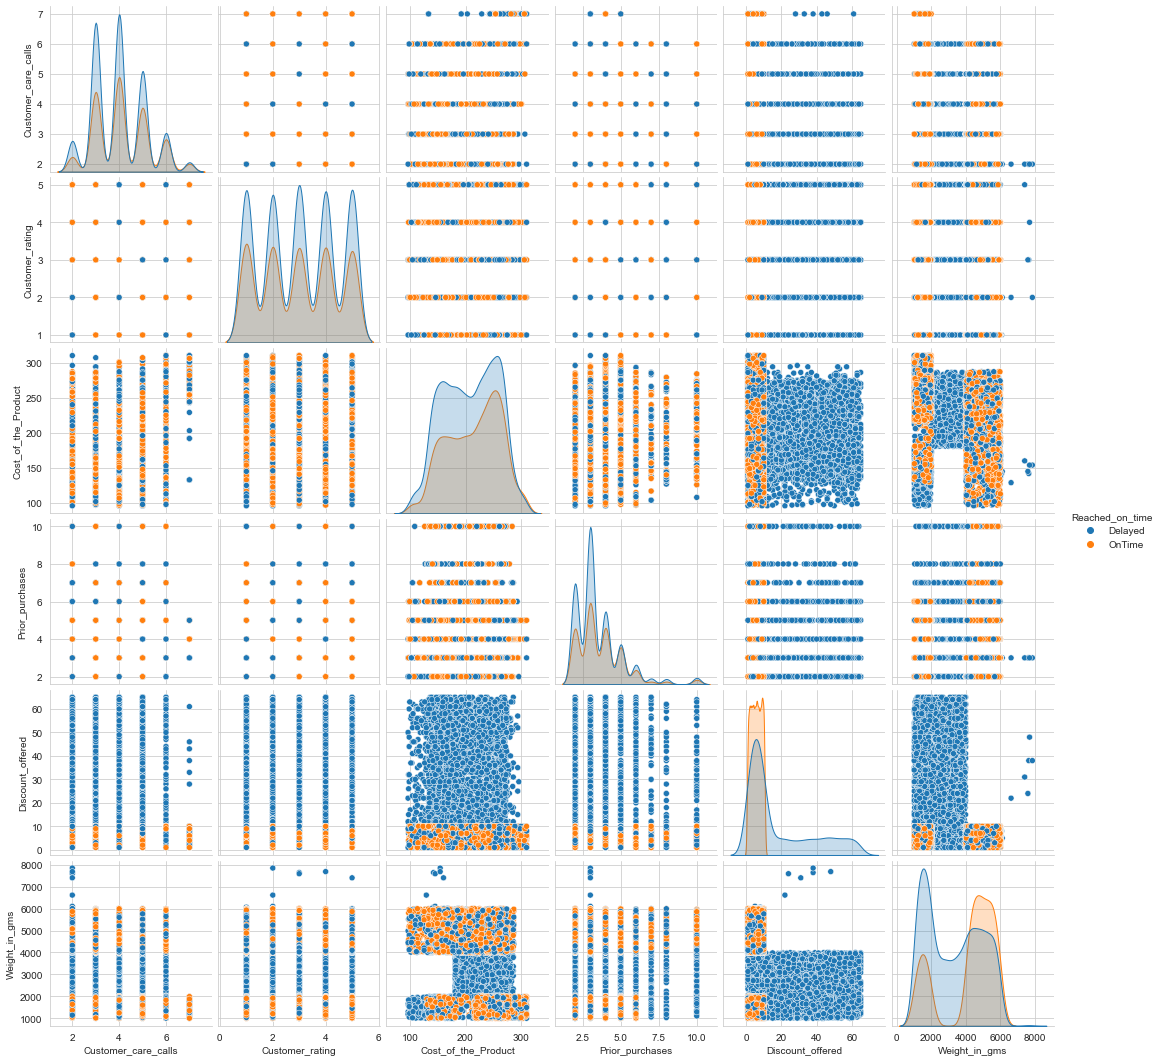

In [21]:
sns.pairplot(cust_data,hue="Reached_on_time")

## `Heatmap to see the correlation between the varaible`

<AxesSubplot:>

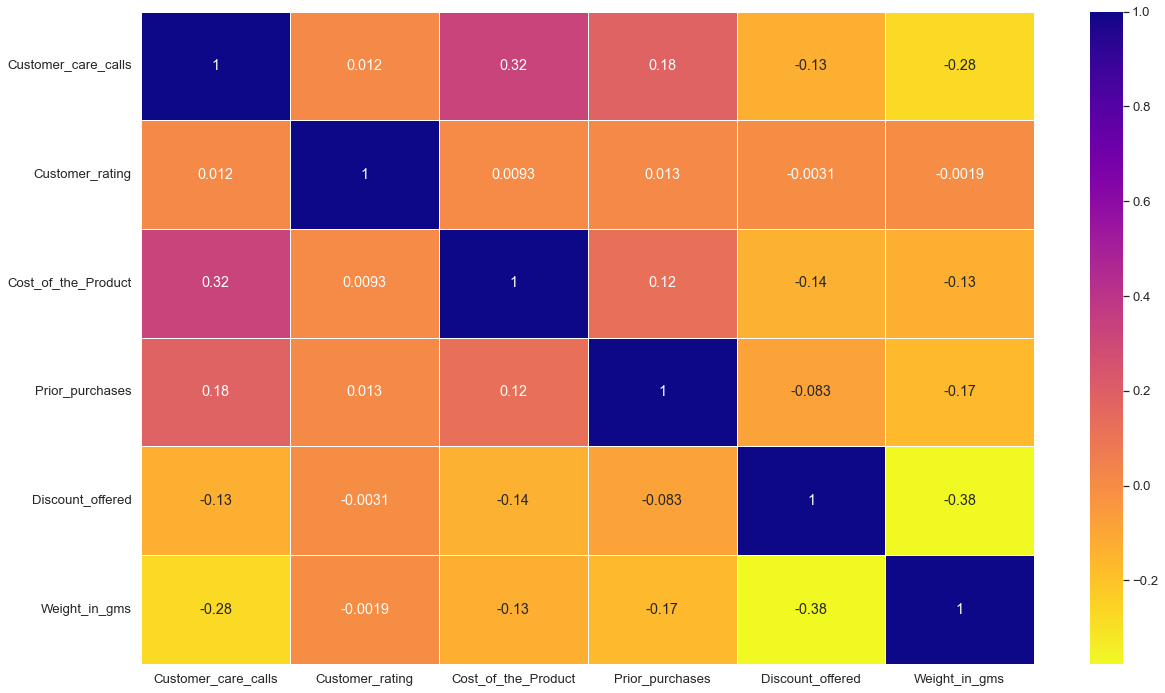

In [22]:
plt.figure(figsize=(20,12))
sns.set(font_scale=1.2)
corre=cust_data.corr()
sns.heatmap(corre,annot=True,cmap="plasma_r",linewidths=.9)

## `Distplot for Cost of the product`

<AxesSubplot:xlabel='Cost_of_the_Product', ylabel='Density'>

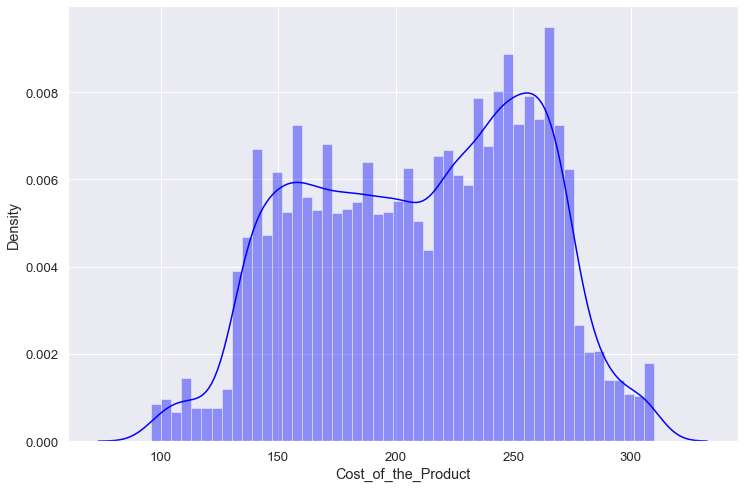

In [23]:
fig=plt.figure(figsize=(12,8))
sns.distplot(cust_data["Cost_of_the_Product"],bins = 50, color="blue")

## `Customer care calls`

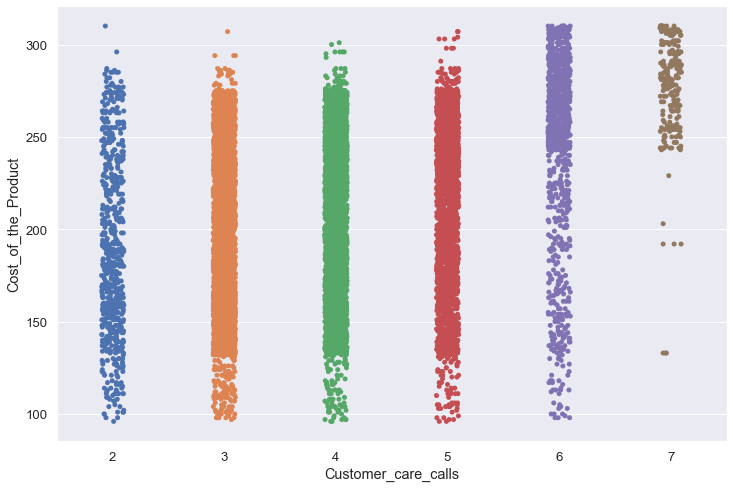

In [24]:
plt.figure(figsize=(12,8))
sns.stripplot(x="Customer_care_calls",y="Cost_of_the_Product", data= cust_data,jitter= True)
plt.show()

## `Warehouse Blocks`

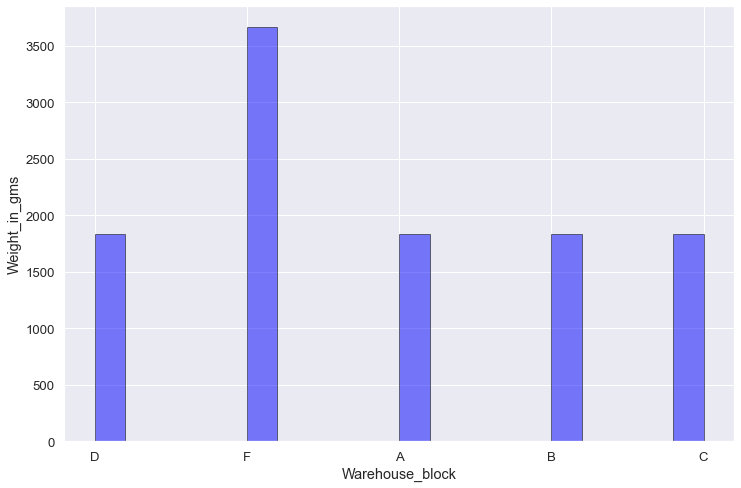

In [25]:
fig=plt.figure(figsize=(12,8))
plt.hist(cust_data["Warehouse_block"], bins = 20,color=('blue'),edgecolor="Black",alpha=0.5)
plt.xlabel("Warehouse_block")
plt.ylabel("Weight_in_gms")
plt.show()

In [26]:
mode = cust_data.groupby(["Mode_of_Shipment"])["Warehouse_block"].value_counts().to_frame()
mode.columns = ["Count"] 
df1 = mode.reset_index(level=[0,1]) 
px.sunburst(df1,path=["Mode_of_Shipment","level_1"],values="Count",
color_discrete_sequence=px.colors.sequential.Hot)

## `Mode Of Shipment`

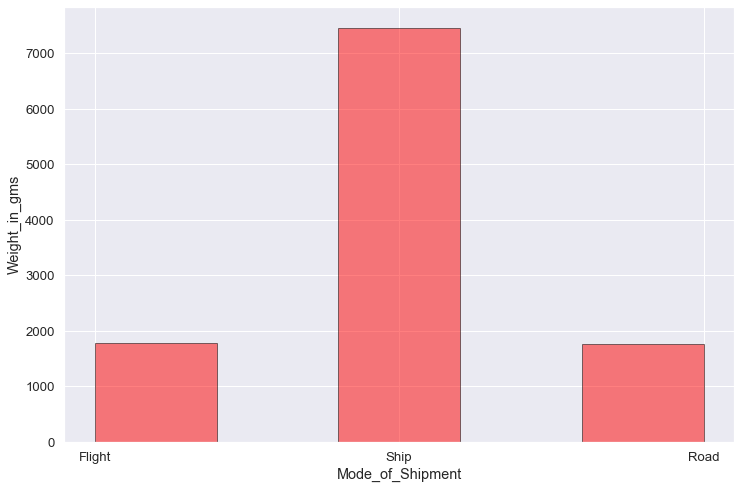

In [27]:
fig=plt.figure(figsize=(12,8))
plt.hist(cust_data["Mode_of_Shipment"], bins = 5, color=('red'),edgecolor="Black",alpha=0.5)
plt.xlabel("Mode_of_Shipment")
plt.ylabel("Weight_in_gms")
plt.show()

<AxesSubplot:xlabel='Product_importance', ylabel='count'>

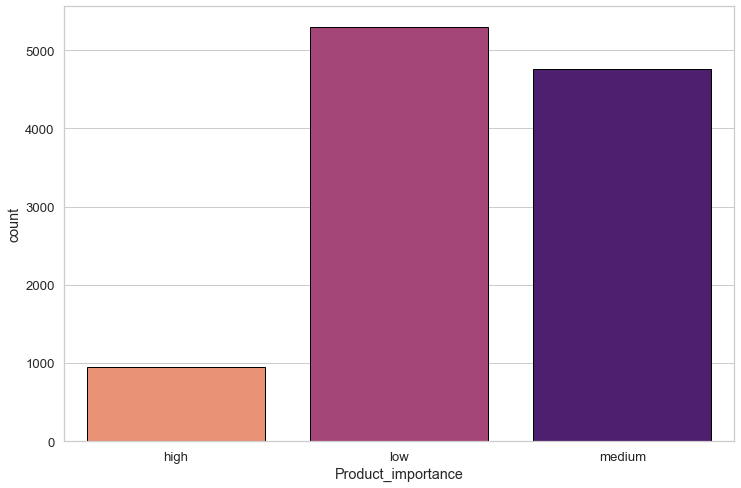

In [28]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.countplot(x="Product_importance",data=cust_data,palette="magma_r",edgecolor="Black")

## `Histogram`

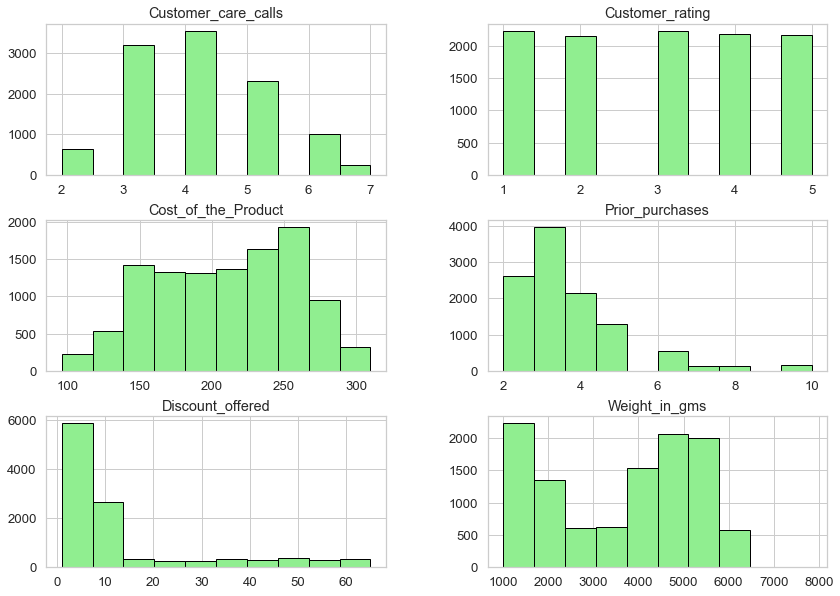

In [29]:
cust_data.hist(color=('lightgreen'),edgecolor="Black",figsize=(14,10))
plt.show()

In [30]:
fig = px.histogram(data_frame = cust_data,x = 'Warehouse_block',color='Customer_care_calls',
title = "<b>Warehouse vs Customer Care Calls</b>")
fig.update_layout(bargap=0.2)
fig.show()

### `countplot of warehouse and see the effect of Reached on time or not.`

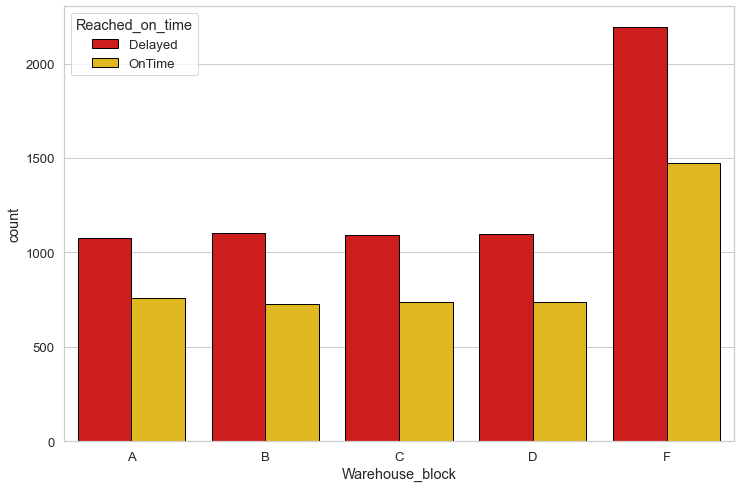

In [31]:
plt.figure(figsize = (12, 8))
sns.countplot('Warehouse_block', hue = 'Reached_on_time', data = cust_data, palette='hot',edgecolor="Black")
plt.show()

### `Countplot of customer ratings  and see the effect on Reached on time or not`

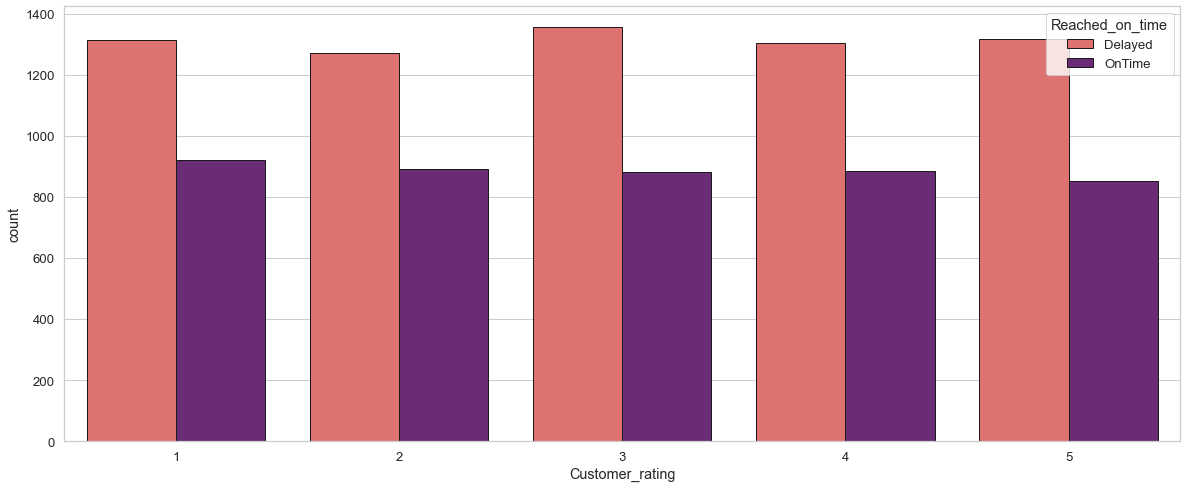

In [32]:
plt.figure(figsize = (20, 8))
sns.countplot('Customer_rating', hue = 'Reached_on_time', data = cust_data, palette='magma_r',edgecolor="k")
plt.show()

## `Density Plots`

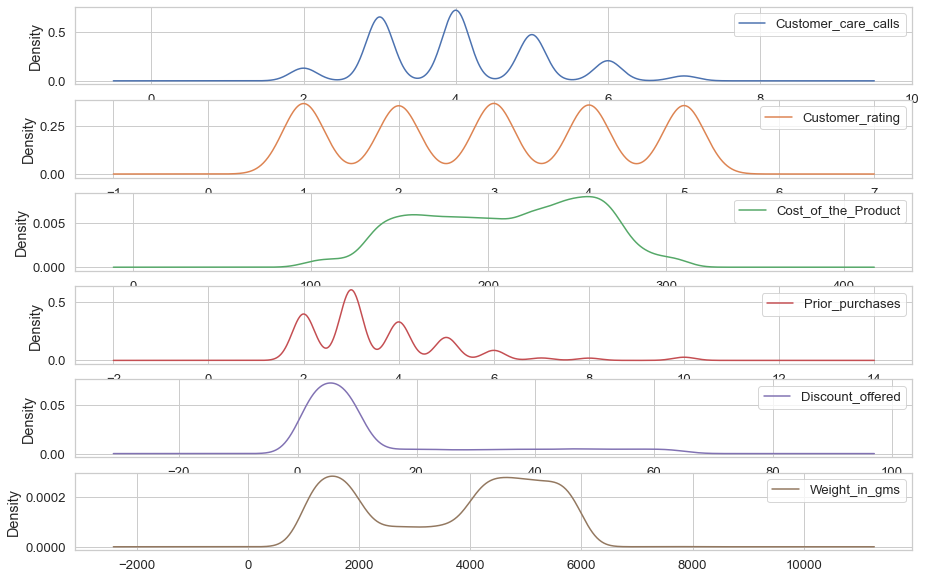

In [33]:
cust_data.plot(kind='density' , subplots=True, figsize=(15,10), sharex=False )
plt.show()

## `Box Plots`

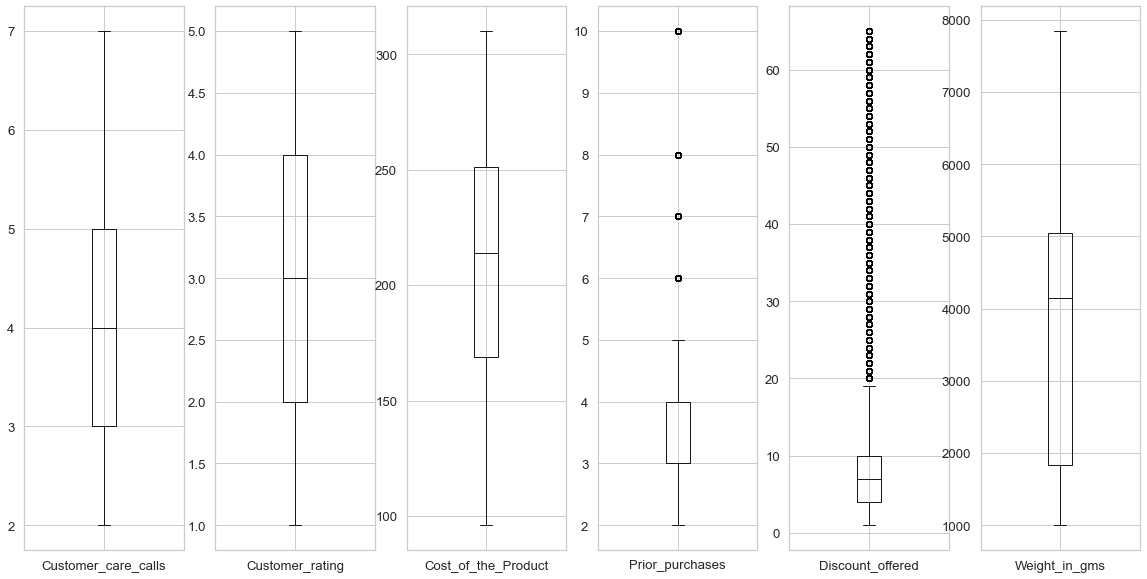

In [34]:
cust_data.plot(kind='box', subplots=True, figsize=(20,10), sharex=False, sharey=False,color="k")
plt.show()

### <span style='background :pink' > Observations:  </span>
`There are outliers in columns 'Prior_purchases' & 'Discount Offer'.`

## `Create the copy of dataset`

In [35]:
data=cust_data.copy()
data

Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0                   D           Flight                    4                2   
1                   F           Flight                    4                5   
2                   A           Flight                    2                2   
3                   B           Flight                    3                3   
4                   C           Flight                    2                2   
...               ...              ...                  ...              ...   
10994               A             Ship                    4                1   
10995               B             Ship                    4                1   
10996               C             Ship                    5                4   
10997               F             Ship                    5                2   
10998               D             Ship                    2                5   

       Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                      177                3                low      F   
1                      216                2                low      M   
2                      183                4                low      M   
3                      176                4             medium      M   
4                      184                3             medium      F   
...                    ...              ...                ...    ...   
10994                  252                5             medium      F   
10995                  232                5             medium      F   
10996                  242                5                low      F   
10997                  223                6             medium      M   
10998                  155                5                low      F   

       Discount_offered  Weight_in_gms Reached_on_time  
0                    44           1233         Delayed  
1                    59           3088         Delayed  
2                    48           3374         Delayed  
3                    10           1177         Delayed  
4                    46           2484         Delayed  
...                 ...            ...             ...  
10994                 1           1538         Delayed  
10995                 6           1247          OnTime  
10996                 4           1155          OnTime  
10997                 2           1210          OnTime  
10998                 6           1639          OnTime  

[10999 rows x 11 columns]

## `Removing Outliers`

In [36]:
#Outliers removing by z-score 

boxes = ["Prior_purchases","Discount_offered"]

for i in boxes:
    print(i)
    z_scores = zscore(data[i])
    print("*"*30)
    for threshold in np.arange(1.5,5,0.5):
        print("Treshold: {}".format(threshold))
        print("Amount of Outliers: {}".format(len((np.where(z_scores > threshold)[0]))))
        print('--'*10)
        
winsorized= winsorize(data["Prior_purchases"],(0,0.10))
wins_data1 = data
wins_data1["Prior_purchases"] = winsorized

winsorized= winsorize(data["Discount_offered"],(0,0.10))
wins_data2 = data
wins_data2["Discount_offered"] = winsorized

Prior_purchases
******************************
Treshold: 1.5
Amount of Outliers: 1003
--------------------
Treshold: 2.0
Amount of Outliers: 442
--------------------
Treshold: 2.5
Amount of Outliers: 306
--------------------
Treshold: 3.0
Amount of Outliers: 178
--------------------
Treshold: 3.5
Amount of Outliers: 178
--------------------
Treshold: 4.0
Amount of Outliers: 178
--------------------
Treshold: 4.5
Amount of Outliers: 0
--------------------
Discount_offered
******************************
Treshold: 1.5
Amount of Outliers: 1382
--------------------
Treshold: 2.0
Amount of Outliers: 999
--------------------
Treshold: 2.5
Amount of Outliers: 584
--------------------
Treshold: 3.0
Amount of Outliers: 181
--------------------
Treshold: 3.5
Amount of Outliers: 0
--------------------
Treshold: 4.0
Amount of Outliers: 0
--------------------
Treshold: 4.5
Amount of Outliers: 0
--------------------


### <span style='background :pink' > Observation:  </span>
 `There are 1003 outliers in "Prior_purchases" & 1382 in "Discount_offered".`

## `After IQR method, Check the outliers using boxplot`

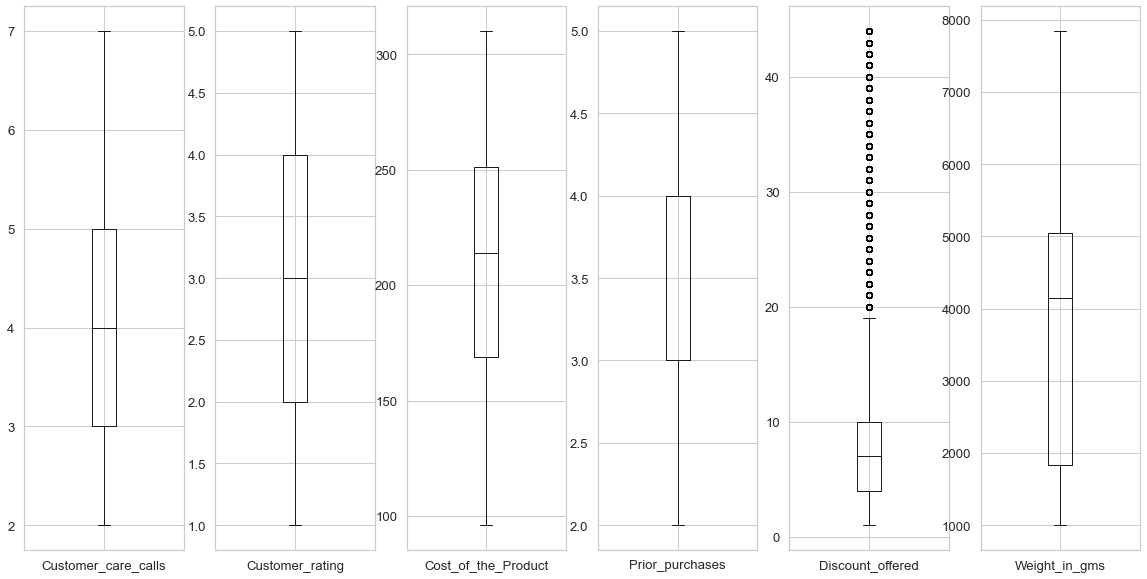

In [37]:
data.plot(kind='box', subplots=True, figsize=(20,10), sharex=False, sharey=False,color="k")
plt.show()

### `Creating dummy variables, for target varaible (y-variable) `

In [38]:
df1 = data.iloc[:,0:11] 
data=pd.get_dummies(df1,drop_first=True) 
data

Customer_care_calls  Customer_rating  Cost_of_the_Product  \
0                        4                2                  177   
1                        4                5                  216   
2                        2                2                  183   
3                        3                3                  176   
4                        2                2                  184   
...                    ...              ...                  ...   
10994                    4                1                  252   
10995                    4                1                  232   
10996                    5                4                  242   
10997                    5                2                  223   
10998                    2                5                  155   

       Prior_purchases  Discount_offered  Weight_in_gms  Warehouse_block_B  \
0                    3                44           1233                  0   
1                    2                44           3088                  0   
2                    4                44           3374                  0   
3                    4                10           1177                  1   
4                    3                44           2484                  0   
...                ...               ...            ...                ...   
10994                5                 1           1538                  0   
10995                5                 6           1247                  1   
10996                5                 4           1155                  0   
10997                5                 2           1210                  0   
10998                5                 6           1639                  0   

       Warehouse_block_C  Warehouse_block_D  Warehouse_block_F  \
0                      0                  1                  0   
1                      0                  0                  1   
2                      0                  0                  0   
3                      0                  0                  0   
4                      1                  0                  0   
...                  ...                ...                ...   
10994                  0                  0                  0   
10995                  0                  0                  0   
10996                  1                  0                  0   
10997                  0                  0                  1   
10998                  0                  1                  0   

       Mode_of_Shipment_Road  Mode_of_Shipment_Ship  Product_importance_low  \
0                          0                      0                       1   
1                          0                      0                       1   
2                          0                      0                       1   
3                          0                      0                       0   
4                          0                      0                       0   
...                      ...                    ...                     ...   
10994                      0                      1                       0   
10995                      0                      1                       0   
10996                      0                      1                       1   
10997                      0                      1                       0   
10998                      0                      1                       1   

       Product_importance_medium  Gender_M  Reached_on_time_OnTime  
0                              0         0                       0  
1                              0         1                       0  
2                              0         1                       0  
3                              1         1                       0  
4                              1         0                       0  
...                          ...       ...                     ...  
10994                       

## <span style='background :yellow' > Splitting The Data </span>

In [39]:
features = data.drop('Reached_on_time_OnTime',axis = 1)
target = data['Reached_on_time_OnTime']

X = data.drop('Reached_on_time_OnTime',axis=1)
Y = data['Reached_on_time_OnTime']

#Feature Engineering 
test=SelectKBest(score_func=chi2,k=10)
fit_data=test.fit(X,Y)
set_printoptions(precision=3)

print(fit_data.scores_)
features=fit_data.transform(X)

[1.593e+01 1.265e+00 6.545e+02 2.326e+01 2.788e+04 5.848e+05 2.389e-01
 1.605e-04 6.315e-03 4.837e-02 5.437e-01 2.349e-02 3.352e-01 7.693e-01
 1.219e-01]


In [40]:
array=data.values
print("-"*21)
print("Number of rows:",array.shape[0])
print("Number of columns:",array.shape[1])
print("-"*21)

---------------------
Number of rows: 10999
Number of columns: 16
---------------------


In [41]:
trainX, testX, trainY, testY = train_test_split(features,target,test_size=0.25, shuffle=True,stratify=target, random_state=42)

normalizer = Normalizer()
features = pd.DataFrame(normalizer.fit_transform(data.drop('Reached_on_time_OnTime',axis=1)),
                                                 columns=data.columns[:-1])
                        
scaler = StandardScaler()
scaler.fit(trainX,trainY)

trainX = scaler.transform(trainX)
testX = scaler.transform(testX)

# <span style='background :yellow' > Model Building </span>

## `1) SVM Model using kernel = rbf`

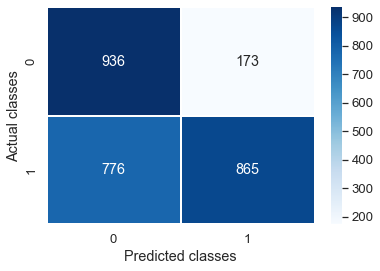

Accuracy Score for SVM model: 65.49090909090908 %
--------------------------------------------------


In [42]:
svm = SVC(kernel='rbf')
svm = svm.fit(trainX, trainY)

sns.heatmap(metrics.confusion_matrix(y_pred = svm.predict(testX), y_true=testY, labels = [1, 0]),annot = True,fmt="d",cmap="Blues",linewidths=.2) 
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')
plt.show()

print("Accuracy Score for SVM model:", svm.score(testX, testY)*100,'%')
print("-"*50)

## `2) Decision Tree model`

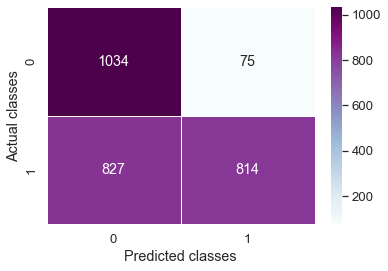

Accuracy Score for Decision Tree model: 67.2 %
------------------------------------------------------------


In [43]:
dt = DecisionTreeClassifier(max_depth=5) 
dt.fit(trainX, trainY)
pca = PCA()
classifier = DecisionTreeClassifier()


sns.heatmap(metrics.confusion_matrix(y_pred = dt.predict(testX), y_true=testY, labels = [1, 0]),annot = True,cmap='BuPu',fmt="d",linewidths=.5) 
font_scale=1
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')
plt.show()

print("Accuracy Score for Decision Tree model:", dt.score(testX, testY)*100,'%')
print("-"*60)

## `3) Logistic Regression`

In [44]:
kfold = KFold(n_splits=10)
model = LogisticRegression(max_iter=500)

logmodel= LogisticRegression()
logmodel.fit(trainX,trainY)
predictions = logmodel.predict(testX)
accuracy=confusion_matrix(testY,predictions)
print(accuracy)

from sklearn.metrics import accuracy_score
accuracy=accuracy_score(testY,predictions)*100
print("-"*50)
print("Accuracy of LogisticRegression",accuracy,"%")
print("-"*50)

[[1134  507]
 [ 495  614]]
--------------------------------------------------
Accuracy of LogisticRegression 63.56363636363637 %
--------------------------------------------------


## `4) Bagged Decision Trees for Classification`

In [45]:
start = time.time()
kfold = KFold(n_splits=10)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees)
results_2 = cross_val_score(model,X, Y, cv=kfold)

classifier=LogisticRegression()
classifier.fit(features, target)
y_pred = classifier.predict(features)

end = time.time()
print("Runtime: {} minutes".format(round((end-start)/60,2)))
print("Bagged Decision Tree:",results_2.mean()*100,"%")
print("-"*50)

Runtime: 0.34 minutes
Bagged Decision Tree: 65.40450823062287 %
--------------------------------------------------


## `5) KNN Classification`

In [46]:
KNN=KNeighborsClassifier()
kfold = KFold(n_splits=10)
model = KNeighborsClassifier(n_neighbors=(5,19))
results_3 = cross_val_score(model, X, Y, cv=kfold)

model=GridSearchCV(estimator=KNN,param_grid={'n_neighbors':range(5,12)})
model.fit(trainX,trainY)
print(model.best_params_)

train_pred=model.predict(trainX)
test_pred=model.predict(testX)

report = classification_report(trainY, train_pred, output_dict=True)
print('Classification Report \n',classification_report(trainY,train_pred))
print("Accuracy:",report["accuracy"]*100,"%")
print("-"*30)

{'n_neighbors': 9}
Classification Report 
               precision    recall  f1-score   support

           0       0.81      0.75      0.78      4922
           1       0.67      0.74      0.70      3327

    accuracy                           0.75      8249
   macro avg       0.74      0.75      0.74      8249
weighted avg       0.75      0.75      0.75      8249

Accuracy: 74.65147290580676 %
------------------------------


## `6) Gaussian Naive Bayes Classification`

In [47]:
kfold = KFold(n_splits=10)
model = GaussianNB()
results_4 = cross_val_score(model,features, target, cv=kfold)
print("Accuracy of Gaussian Naive Bayes Classification",results_4.mean()*100,"%")
print("-"*67)

Accuracy of Gaussian Naive Bayes Classification 63.75008685581934 %
-------------------------------------------------------------------


## `7) Random Forest Model`

In [48]:
start = time.time()
clf=RandomForestClassifier()
param_grid= {'n_estimators':[50,75,100,125,150],'max_features':[2,3,4,5]}
gsv=GridSearchCV(clf,param_grid)
gsv.fit(trainX,trainY)
print(gsv.best_params_)


x=features 
num_trees=50
max_features= 3
kfold=KFold(n_splits=10)
model_RF=RandomForestClassifier(n_estimators=num_trees,max_features=max_features)
model_RF.fit(features,Y)
results=cross_val_score(model_RF,x,target,cv=kfold) 
Acc_1=results.mean()*100
end = time.time()
print("Runtime: {} minutes".format(round((end-start)/60, 2)))
print("-"*44)
print("Accuracy using Grid search:",(gsv.best_score_)*100,"%")
print("Accuracy of Random forest after KFold cross validation:", Acc_1,"%")
print("-"*75)

{'max_features': 2, 'n_estimators': 75}
Runtime: 1.06 minutes
--------------------------------------------
Accuracy using Grid search: 66.62628957862432 %
Accuracy of Random forest after KFold cross validation: 65.35921085284141 %
---------------------------------------------------------------------------


## `Hyperparamter Tuning - GridSearch CV`

In [49]:
param_grid={
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]}

rf=RandomForestClassifier()
grid_search= GridSearchCV(estimator=rf,param_grid=param_grid,cv=kfold,n_jobs=-1,verbose=2)
rf=RandomForestClassifier(bootstrap=True,max_depth=110,max_features=3,min_samples_leaf=4,min_samples_split=8,n_estimators=100)

rf.fit(trainX,trainY)
rf.fit(testX,testY)


Accuracy_value=cross_val_score(rf,x,Y,cv=kfold,scoring='accuracy')

print('\n Accuracy Value for k-fold cross validation:\n', Accuracy_value)
print("-"*40)
print("Train Accuracy:",rf.score(trainX,trainY)*100)
print("Test Accuracy:",rf.score(testX,testY)*100)
print("Accuracy of the model:",round(Accuracy_value.mean(),2)*100,'%')
print("-"*40)


 Accuracy Value for k-fold cross validation:
 [0.999 0.998 0.929 0.554 0.541 0.528 0.532 0.53  0.518 0.514]
----------------------------------------
Train Accuracy: 66.14135046672324
Test Accuracy: 95.19999999999999
Accuracy of the model: 66.0 %
----------------------------------------


In [50]:
start = time.time()

rf = RandomForestClassifier()
rf.get_params()
params = {"max_depth":[x for x in range (3,15)],
         "min_samples_split":[x for x in range (2,5)],
         "min_samples_leaf":[x for x in range (1,3)],}

from sklearn.model_selection import GridSearchCV
grid_cv = GridSearchCV(estimator=rf,
                       param_grid = params,
                       cv = 10)
grid_cv.fit(trainX, trainY)
print("Best Parameters:", grid_cv.best_params_)
rf = RandomForestClassifier(max_depth=7, min_samples_leaf= 2, min_samples_split= 2)
rf.fit(trainX, trainY)
end = time.time()
print("Runtime: {} minutes".format(round((end-start)/60, 2)))
print("-"*45)
print("Accuracy of Grid Search CV",rf.score(trainX, trainY)*100,"%")
print("-"*45)

Best Parameters: {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 4}
Runtime: 4.04 minutes
---------------------------------------------
Accuracy of Grid Search CV 71.87537883379804 %
---------------------------------------------


## `8) XGBoost Model`

In [51]:
start = time.time()
 
#Model Training
kfold=KFold(n_splits=10)
model_XGB=XGBClassifier() 
results=cross_val_score(model_XGB,X,Y,cv=kfold)
Acc=results.mean()*100
print("Average Accuracy of XGBoost Model After KFold Cross Validation: ", Acc,"%")
print("-"*82)
model = XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)
model.fit(trainX, trainY)
end = time.time()
print("Runtime: {} minutes".format(round((end-start)/60, 2)))
print("Accuracy of XGB with mlogloss",round(model.score(testX, testY)*100,2),"%")
print("_"*40)

Average Accuracy of XGBoost Model After KFold Cross Validation:  65.45902059723716 %
----------------------------------------------------------------------------------
Runtime: 0.09 minutes
Accuracy of XGB with mlogloss 65.24 %
________________________________________


## `9) AdaBoost Classifier`

In [52]:
ada_obj = AdaBoostClassifier(random_state=42)
ada_classifier = ada_obj.fit(trainX, trainY)
y_pred_ada = ada_classifier.predict(testX)

print(confusion_matrix(testY,y_pred_ada))
print(classification_report(testY,y_pred_ada))

#10 Fold Cross Validation
accuracies = cross_val_score(estimator = ada_classifier, X=trainX, y=trainY, cv=10)
accuracies
print("10 Fold Cross Validation:",accuracies)
print("Mean Accuracy:",np.mean(accuracies)*100)
print("_"*32)

[[948 693]
 [224 885]]
              precision    recall  f1-score   support

           0       0.81      0.58      0.67      1641
           1       0.56      0.80      0.66      1109

    accuracy                           0.67      2750
   macro avg       0.68      0.69      0.67      2750
weighted avg       0.71      0.67      0.67      2750

10 Fold Cross Validation: [0.672 0.703 0.685 0.653 0.69  0.669 0.686 0.657 0.681 0.674]
Mean Accuracy: 67.69301265077964
________________________________


## `10) Stacking`

In [53]:
from sklearn.ensemble import VotingClassifier

kfold =KFold(n_splits=10)
start = time.time()
estimators=[]
model1=DecisionTreeClassifier(max_depth=5)
estimators.append(('Decision',model1))

model2=KNeighborsClassifier()
estimators.append(('KNeighbors',model2))

model3=AdaBoostClassifier()
estimators.append(('AdaBoost',model3))

model4=XGBClassifier()
estimators.append(("xgboost",model4))

model5=LogisticRegression(random_state=42)
estimators.append(('logisticRegression',model5))

model6=SVC(probability=True, random_state=42)
estimators.append(('SVC',model6))

model7=GradientBoostingClassifier()
estimators.append(('GradientBoostingClassifier',model7))

model8=CatBoostClassifier(verbose=0)
estimators.append(('CatBoost',model8))

model9=MLPClassifier()
estimators.append(('NeuralNetwork',model9))

model10=LinearSVC()
estimators.append(('LinearSVC',model10))

model11=RandomForestClassifier(random_state=42)
estimators.append(('RandomForestClassifier',model11))


ensemble=VotingClassifier(estimators)
results =cross_val_score(ensemble,X,Y,cv=kfold)

end = time.time()
print("Runtime: {} minutes".format(round((end-start)/60, 2)))
print('\n Accuracy of model:',results.mean()*100)
print("*"*40)

Runtime: 5.55 minutes

 Accuracy of model: 67.27766564645546
****************************************


In [54]:
data = {"Machine Learning Model":pd.Series(["Decision Trees","KNN Classification","Logistic Regression",
                                   "Random Forest Model","Gaussian Naive Bayes ",
                                   "XGBoost Model","RF with Grid Search","Adaboost Classification","Stacking"]),
        "Accuracy":pd.Series([dt.score(testX, testY)*100,report["accuracy"]*100,accuracy,
                              round(Accuracy_value.mean(),2)*100, results_4.mean()*100,
                              Acc,rf.score(trainX, trainY)*100,np.mean(accuracies)*100,results.mean()*100])}
table =pd.DataFrame(data)
table

Machine Learning Model   Accuracy
0           Decision Trees  67.200000
1       KNN Classification  74.651473
2      Logistic Regression  63.563636
3      Random Forest Model  66.000000
4    Gaussian Naive Bayes   63.750087
5            XGBoost Model  65.459021
6      RF with Grid Search  71.875379
7  Adaboost Classification  67.693013
8                 Stacking  67.277666

## File Dumping

`import pickle as pi
p_out  = open("model.pkl", "wb")
pi.dump(model, p_out)
p_out.close()`